## Titanic - Machine Learning for Disaster
Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.
The objective is to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

The data has been split into two groups:
- training set (train.csv)
- test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

In [4]:
import os
import pandas

In [3]:
os.listdir('titanic')

['gender_submission.csv', 'test.csv', 'train.csv']

In [6]:
raw_train_set = pandas.read_csv('titanic/train.csv')
raw_train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
raw_train_set.shape

(891, 12)

## Data Exploration
Guide for data exploration:
https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/

**Variable identification**

The variables present in the data set are: PassengerId, Survived, Pclass, Name, Sex, Age, SibSp (# of siblings / spouses aboard the Titanic), Parch (# of parents / children aboard the Titanic), Ticket, Fare, Cabin & Embarked. 

We can divide the variables of the data set according to different criteria

Type of variable
- Predictor variable: Pclass, Sex, Age, SibSp, Parch, Fare, Cabin, Embarked
- Target variable: Survived
The variables we are discarding to make the prediction are PassengerID, Name and Ticket. 

Data type
- Numeric: Pclass, Age, SibSp, Parch, Fare, Survived
- Character: Sex, Cabin, Embarked
The character variables Sex and Embarked can be converted to numeric by assigning each category to a number.


Variable category
- Categorical: Survived (0 = No, 1 = Yes), Pclass (1 = 1st, 2 = 2nd, 3 = 3rd), Sex, Embarked (C = Cherbourg, Q = Queenstown, S = Southampton)
- Continuous:  Age, SibSp, Parch, Fare

**Univariate analysis**

The method to perform univariate analysis will depend if the variable is categorical or continuous.

In the case of continuous variables, we need to understand the central tendency and spread. 
- Central tendency: mean, median, mode, min, max
- Dispersion: range, quartile, IQR, variance, standard deviation, skewness and kurtois
- Visualization methods: histogram, box plot

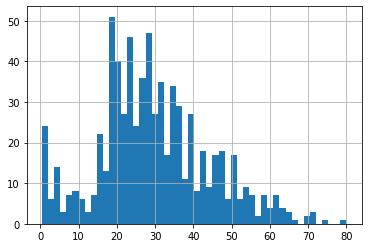

In [16]:
raw_train_set['Age'].hist(bins=50)

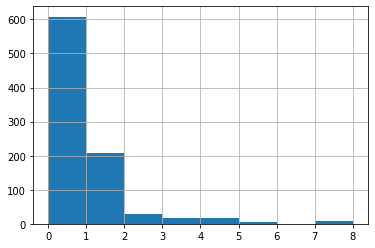

In [18]:
raw_train_set['SibSp'].hist(bins=8)

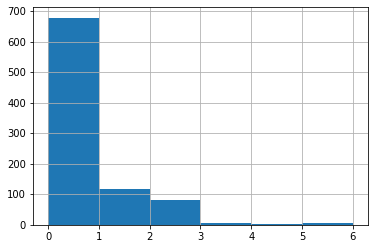

In [20]:
raw_train_set['Parch'].hist(bins=6)

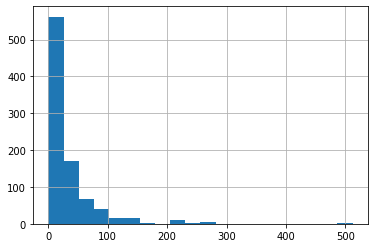

In [41]:
raw_train_set['Fare'].hist(bins=20)

In case of categorical variables, we can use a frequency table to understand the distribution for each category.

In [38]:
print("Not survived: ",sum(raw_train_set['Survived'] == 0))
print("Survived: ",sum(raw_train_set['Survived'] == 1))

Not survived:  549
Survived:  342


In [39]:
print("1st: ",sum(raw_train_set['Pclass'] == 1))
print("2nd: ",sum(raw_train_set['Pclass'] == 2))
print("3rd: ",sum(raw_train_set['Pclass'] == 3))

1st:  216
2nd:  184
3rd:  491


In [36]:
print("Male: ",sum(raw_train_set['Sex'] == 'male'))
print("Female: ",sum(raw_train_set['Sex'] == 'female'))

Male:  577
Female:  314


In [37]:
print("Cherbourg: ",sum(raw_train_set['Embarked'] == 'C'))
print("Queenstown: ",sum(raw_train_set['Embarked'] == 'Q'))
print("Southampton: ",sum(raw_train_set['Embarked'] == 'S'))

Cherbourg:  168
Queenstown:  77
Southampton:  644


**Missing data**